## Weighted Importance Sampling

**Weighted Importance Sampling** is a technique used to estimate expectations in two primary cases:
* **Unnormalized distribution** - when the target pdf $p(x)$ is known only up to a constant - $\tilde p(x)$.
* **Boundedness requirement** - when we need to ensure the estimator stays within the range of the sampled function $f(x)$.

The WIS estimator is **biased** for finite sample sizes but is consistent (converges to the true value as samples increase). In practice, the bias is typically small.

### Derivation

Standard importance sampling formula:
$$ \mu = \int f(x) { p(x) \over q(x) } q(x) dx $$
Assuming we don't have access to normalized $ p(x) $ and $ q(x) $ but instead we have $ \tilde p(x) = p(x) c_p $ and $ \tilde q(x) = q(x) c_q $:
$$ \mu = {c_q \over c_p} \int f(x) { \tilde p(x) \over \tilde q(x) } q(x) dx $$
Define $ w(x) = { \tilde p(x) \over \tilde q(x) } $:
$$ \mu = {c_q \over c_p} \int f(x) w(x) q(x) dx $$
Since $ \int w(x) q(x) dx = {c_p \over c_q} $:
$$ \mu = { \int f(x) w(x) q(x) dx \over \int w(x) q(x) dx } $$
Using MC estimator for both nominator and denominator while assuming $ x_i \sim q(x) $:
$$ \tilde \mu = { \cancel{1 \over N } \sum f(x_i) w(x_i) \over \cancel{1 \over N } \sum w(x_i) } = { \sum f(x_i) w(x_i) \over \sum w(x_i) } = \sum f(x_i) { w(x_i) \over \sum w(x_j) } $$


### Source of bias

Because we use two separate MC estimators in the last step, we introduce the bias due to the fact that **the expectation of ratio is not the same as ratio of expectations**:
$$ E\left[{X \over Y}\right] \ne { E[X] \over E[Y] } $$
However, as numer of samples $ n \to \infty $, the result converges.

### Boundedness
The WIS has interesting property that it is bounded. Looking at the equation in the following form:
$$ \tilde \mu = \sum f(x_i) { w(x_i) \over \sum w(x_j) } $$
And noticing that $ \sum { w(x_i) \over \sum w(x_j) } = 1 $, we can see that the result is always bounded by the original range of $f(x)$.

### Generalization of WIS

In the paper [Improved Stochastic Texture Filtering Through Sample Reuse (2025)](https://arxiv.org/abs/2504.05562), the author proposes the general equation for WIS where each sample is taken with different proposal pdf, while sharing the same characteristics as the standard WIS equation:
$$ \sum f(x_i) { w_i (x_i) \over \sum w_j(x_j) } $$
$$ w_i(x) = { p(x) \over q_i(x) } $$
where $ q_i $ is a different pdf per sample.

### Code example

Simple numpy implementation of Weighted Importance Sampling (WIS).
Estimate the expectation $ E[x^3] $ for a standard normal target using a shifted proposal distribution. The example explicitly uses unnormalized PDFs to demonstrate the self-normalizing property of the WIS estimator.
$$ E[x^3] = 0 $$

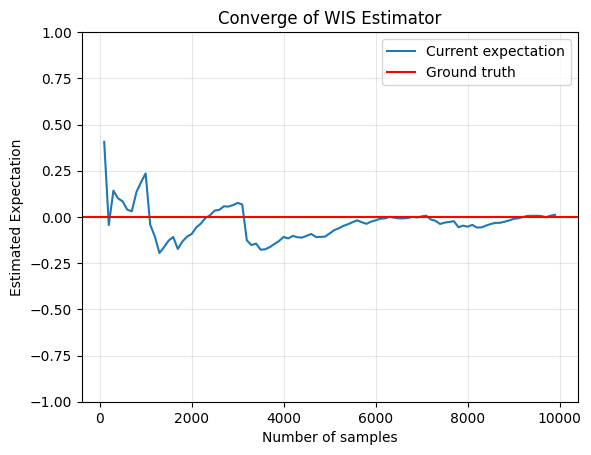

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def normal_pdf(x, mu=0.0, sigma=1.0, skip_norm=False):
    result = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    if skip_norm:
        return result  # for WIS we can skip normalization of p(x) and q(x)

    normalization_factor = 1.0 / (sigma * np.sqrt(2 * np.pi))
    return normalization_factor * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


# The function we're trying to calculate the expectation for: E[x^3]
def f(x):
    return x * x * x


# Target function (not normalized)
def p_pdf(x):
    return normal_pdf(x, 0, 1, True)


# Proposal function (not normalized)
q_shift = 1
def q_pdf(x):
    return normal_pdf(x, q_shift, 1, True)  # Shifted normal distribution


samples_num = 10000
q_samples = np.random.randn(samples_num) + q_shift  # Samples from q(x)
w = p_pdf(q_samples) / q_pdf(q_samples)
f_val = f(q_samples)

y = []
x = []
step_size = 100

for i in range(step_size, samples_num, step_size):
    w_subset = w[:i]
    f_subset = f_val[:i]

    # WIS estimator
    w_norm = w_subset / np.sum(w_subset)
    E = np.sum(f_subset * w_norm)

    y.append(E)
    x.append(i)

# Plot the results
plt.title("Converge of WIS Estimator")
plt.xlabel("Number of samples")
plt.ylabel("Estimated Expectation")
plt.plot(x, y, label="Current expectation")
plt.axhline(y=0, color="r", label="Ground truth")
plt.legend()
plt.grid(True, alpha=0.3)
_ = plt.ylim(-1, 1)